In [1]:
import geopandas as gpd
import pandas as pd

import mapillary as mly
import json

import glob




### netzwerk einlesen

In [2]:

set_date = "250805" 

highways=gpd.read_parquet(f"processed_osm_files/processed_hw5030_germany_{set_date}.parquet")
# motorways=gpd.read_parquet(f"processed_osm_files/processed_motorways_germany_{set_date}.parquet")



In [3]:
len(highways)

7469757

In [4]:
schools = gpd.read_file(f"processed_osm_files/processed_schools_germany_{set_date}.fgb", engine="pyogrio")

In [5]:
len(schools)

81482

In [6]:
#schools[:10].explore()

In [7]:
highways

,osm_id,highway,maxspeed,maxspeed_conditional,maxspeed_hgv,maxspeed_hgv_conditional,maxspeed_backward,maxspeed_forward,maxspeed_backward_conditional,maxspeed_forward_conditional,maxspeed_type,zone_traffic,zone_maxspeed,name,ref,geometry
0,92,residential,30,None,None,None,None,None,None,None,None,None,DE:30,Eigenheimstraße,None,"LINESTRING (13.73698 51.01663, 13.73752 51.016..."
1,93,residential,30,None,None,None,None,None,None,None,None,None,None,Eigenheimberg,None,"LINESTRING (13.73939 51.01669, 13.73967 51.016..."
2,99,tertiary,None,None,None,None,None,None,None,None,None,DE:urban,None,None,None,"LINESTRING (11.36639 48.17411, 11.36643 48.174..."
3,100,secondary,100,None,None,None,None,None,None,None,None,DE:rural,None,None,None,"LINESTRING (11.33037 48.1801, 11.33032 48.1801..."
4,103,residential,5,None,None,None,None,None,None,None,None,None,None,Altmockritz,None,"LINESTRING (13.74127 51.01615, 13.74149 51.016..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7469752,1420259518,primary_link,None,None,None,None,None,None,None,None,None,None,None,Neptunstraße,None,"LINESTRING (8.52818 53.52517, 8.52821 53.52509..."
7469753,1420259519,residential,50,None,None,None,None,None,None,None,None,None,None,Neptunstraße,None,"LINESTRING (8.52833 53.52489, 8.52821 53.52477)"
7469754,1420259520,primary,70,None,None,None,None,None,None,None,None,None,None,None,B 212,"LINESTRING (8.52818 53.52517, 8.52729 53.52547)"
7469755,1420259521,unclassified,None,None,None,None,None,None,None,None,None,None,None,Asbestosstraße,None,"LINESTRING (8.53408 53.52279, 8.53404 53.52276)"


In [8]:
filtered_hws_30 = highways[
    (highways["maxspeed"].isin(["30"])) |
    (highways["maxspeed_backward"].isin(["30"])) |
    (highways["maxspeed_forward"].isin(["30"])) |

    (highways["maxspeed_conditional"].str.contains("30 @", na=False)) |
    (highways["maxspeed_backward_conditional"].str.contains("30 @", na=False)) |
    (highways["maxspeed_forward_conditional"].str.contains("30 @", na=False)) |

    (highways["maxspeed_hgv"].isin(["30"])) |
    (highways["maxspeed_hgv_conditional"].str.contains("30 @", na=False)) |

    (highways["zone_maxspeed"].isin(["DE:30"]))

]
len(filtered_hws_30)

1112161

In [9]:
filtered_hws_30

,osm_id,highway,maxspeed,maxspeed_conditional,maxspeed_hgv,maxspeed_hgv_conditional,maxspeed_backward,maxspeed_forward,maxspeed_backward_conditional,maxspeed_forward_conditional,maxspeed_type,zone_traffic,zone_maxspeed,name,ref,geometry
0,92,residential,30,None,None,None,None,None,None,None,None,None,DE:30,Eigenheimstraße,None,"LINESTRING (13.73698 51.01663, 13.73752 51.016..."
1,93,residential,30,None,None,None,None,None,None,None,None,None,None,Eigenheimberg,None,"LINESTRING (13.73939 51.01669, 13.73967 51.016..."
6,105,residential,30,None,None,None,None,None,None,None,None,None,None,Altpestitz,None,"LINESTRING (13.73698 51.01663, 13.73643 51.016..."
7,107,residential,30,None,None,None,None,None,None,None,None,None,None,Trienter Straße,None,"LINESTRING (13.73507 51.01914, 13.73505 51.019..."
8,109,residential,30,None,None,None,None,None,None,None,None,None,None,Tirmannstraße,None,"LINESTRING (13.73673 51.01911, 13.73676 51.018..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7469654,1420238189,tertiary,30,None,None,None,None,None,None,None,None,None,None,Bürgerstraße,None,"LINESTRING (13.729 51.07636, 13.72905 51.07635)"
7469655,1420238190,tertiary,30,None,None,None,None,None,None,None,None,None,None,Bürgerstraße,None,"LINESTRING (13.72884 51.07638, 13.729 51.07636)"
7469725,1420255506,residential,30,None,None,None,None,None,None,None,sign,DE:urban,None,Pappelhofer Weg,None,"LINESTRING (13.22067 52.86824, 13.22323 52.86668)"
7469726,1420255507,residential,None,None,None,None,50,30,None,None,sign,DE:urban,None,Pappelhofer Weg,None,"LINESTRING (13.22323 52.86668, 13.22332 52.866..."


<Axes: >

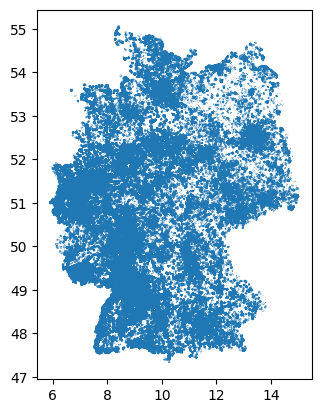

In [10]:
filtered_hws_30.plot()

In [11]:


## TRAFFFIC SIGNS
# https://www.mapillary.com/developer/api-documentation/traffic-signs?locale=






#mapillary_trafficsigns = gpd.read_parquet("../preprocessing/mapillary_map-feature-data_ger_2025-06-07.parquet") ## -> 184120 features
#mapillary_trafficsigns = gpd.read_parquet("../preprocessing/mapillary_map-feature-data_ger_2025-07-30.parquet") ## -> 213732 features

# Find all parquet files in the tile_cache folder (per state)
parquet_files = glob.glob("../../output/*.parquet")

# Read all files and concatenate into one GeoDataFrame
mapillary_trafficsigns = gpd.GeoDataFrame(
    pd.concat([gpd.read_parquet(f) for f in parquet_files], ignore_index=True),
    crs=gpd.read_parquet(parquet_files[0]).crs
)




# Tempo 30 Schilder in Germany
mapillary_trafficsigns_t30=mapillary_trafficsigns[mapillary_trafficsigns.value=="regulatory--maximum-speed-limit-30--g1"]


mapillary_trafficsigns_t30=mapillary_trafficsigns_t30.drop_duplicates(subset=['id'])


mapillary_trafficsigns_t30

,geometry,first_seen_at,id,last_seen_at,value,tile_x,tile_y
28,POINT (9.74703 53.58617),2018-07-01,1205112549931851,2018-07-01,regulatory--maximum-speed-limit-30--g1,8635,5292
57,POINT (9.74208 53.58656),2018-06-07,214233563574464,2018-06-07,regulatory--maximum-speed-limit-30--g1,8635,5292
70,POINT (9.74048 53.58506),2019-01-26,308834137507954,2019-01-26,regulatory--maximum-speed-limit-30--g1,8635,5292
85,POINT (9.74616 53.59237),2018-09-01,855624655031226,2018-09-01,regulatory--maximum-speed-limit-30--g1,8635,5292
86,POINT (9.7535 53.58378),2018-06-07,1006900183177733,2018-06-07,regulatory--maximum-speed-limit-30--g1,8635,5292
...,...,...,...,...,...,...,...
6088452,POINT (8.93354 53.04178),2022-06-09,595947475462131,2022-06-09,regulatory--maximum-speed-limit-30--g1,8598,5333
6088458,POINT (8.93177 53.04153),2022-06-09,589235212572382,2022-06-09,regulatory--maximum-speed-limit-30--g1,8598,5333
6088569,POINT (8.93217 53.03876),2019-09-22,4419774808053718,2019-09-22,regulatory--maximum-speed-limit-30--g1,8598,5334
6088584,POINT (8.95608 53.07611),2018-11-16,343564887100937,2018-11-16,regulatory--maximum-speed-limit-30--g1,8599,5331


In [12]:
##  newer than 2025-01-01

mapillary_trafficsigns_t30=mapillary_trafficsigns_t30[mapillary_trafficsigns_t30["last_seen_at"] > "2025-01-01"]
len(mapillary_trafficsigns_t30)

23291

In [13]:
from datetime import datetime

##  at least 12 months between first and last seen (to avoid temporary signs)
## might need to adjust this

def months_between(date1, date2):
    d1 = datetime.strptime(date1, "%Y-%m-%d")
    d2 = datetime.strptime(date2, "%Y-%m-%d")
    return abs((d2.year - d1.year) * 12 + d2.month - d1.month)

mapillary_trafficsigns_t30_temp = mapillary_trafficsigns_t30[
    mapillary_trafficsigns_t30.apply(lambda row: months_between(row['first_seen_at'], row['last_seen_at']) >= 12, axis=1)
]
mapillary_trafficsigns_t30_temp

,geometry,first_seen_at,id,last_seen_at,value,tile_x,tile_y
8832,POINT (9.87618 53.53389),2022-08-09,777711766700900,2025-02-12,regulatory--maximum-speed-limit-30--g1,8641,5296
21029,POINT (9.91394 53.55838),2024-01-27,630099809260925,2025-02-12,regulatory--maximum-speed-limit-30--g1,8643,5294
30400,POINT (9.95063 53.55605),2023-02-25,127895683542225,2025-02-09,regulatory--maximum-speed-limit-30--g1,8644,5294
30920,POINT (9.94959 53.5589),2021-03-27,288628959597559,2025-02-10,regulatory--maximum-speed-limit-30--g1,8644,5294
32692,POINT (9.93488 53.55044),2021-12-23,133101935915340,2025-02-10,regulatory--maximum-speed-limit-30--g1,8644,5295
...,...,...,...,...,...,...,...
6082525,POINT (8.81462 53.04022),2018-08-05,1388804631483976,2025-03-08,regulatory--maximum-speed-limit-30--g1,8593,5334
6083221,POINT (8.84596 53.06639),2022-04-10,158415486601924,2025-04-27,regulatory--maximum-speed-limit-30--g1,8594,5332
6083675,POINT (8.85376 53.08265),2020-06-03,527376378450977,2025-03-27,regulatory--maximum-speed-limit-30--g1,8594,5330
6084857,POINT (8.85567 53.0818),2020-06-03,292833012214109,2025-05-27,regulatory--maximum-speed-limit-30--g1,8595,5330


<Axes: >

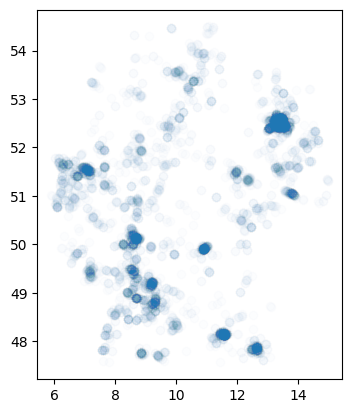

In [14]:
mapillary_trafficsigns_t30_temp.plot(alpha=0.01)

In [82]:
## now create a buffer around the traffic signs to check if there is a tempo30 nearby
df_buffered = mapillary_trafficsigns_t30_temp.to_crs(25833).copy()
df_buffered["geometry"] = df_buffered.geometry.buffer(50)
df_buffered = df_buffered.to_crs(mapillary_trafficsigns_t30_temp.crs)


In [83]:
## now create a buffer around the schools to check if there is a sign nearby
df_schools_buffered = schools.to_crs(25833).copy()
df_schools_buffered["geometry"] = df_schools_buffered.geometry.buffer(400)
df_schools_buffered = df_schools_buffered.to_crs(mapillary_trafficsigns_t30_temp.crs)

In [84]:
import geopandas as gpd

def mark_intersections(buffered_df, target_layer, column_name="has_intersection"):
    """
    Marks which geometries in `buffered_df` intersect with `target_layer`.

    Parameters:
    - buffered_df (GeoDataFrame): The GeoDataFrame containing buffered geometries.
    - target_layer (GeoDataFrame): The GeoDataFrame to check for intersections (e.g., cycleways, motorways).
    - column_name (str): Name of the column to add/overwrite in `buffered_df` indicating intersection (bool).

    Returns:
    - GeoDataFrame: `buffered_df` with a new boolean column `column_name`.
    """
    # Ensure CRS matches
    buffered_df = buffered_df.to_crs(target_layer.crs)

    # Perform spatial join to find intersecting geometries
    joined = gpd.sjoin(buffered_df, target_layer, how="inner", predicate="intersects")

    # Initialize the new column to False
    buffered_df[column_name] = False

    # Set True for geometries that intersect
    matches = joined.index.unique()
    buffered_df.loc[matches, column_name] = True

    return buffered_df


In [85]:
# For cycleways
df_buffered = mark_intersections(df_buffered, filtered_hws_30, column_name="has_t30_intersection")

# # For motorways
# df_buffered = mark_intersections(df_buffered, motorways, column_name="has_mw_intersection")

df_buffered = mark_intersections(df_buffered, df_schools_buffered, column_name="has_school_intersection")



In [86]:
df_buffered

,geometry,first_seen_at,id,last_seen_at,value,tile_x,tile_y,has_t30_intersection,has_school_intersection
8832,"POLYGON ((9.87693 53.53392, 9.87694 53.53387, ...",2022-08-09,777711766700900,2025-02-12,regulatory--maximum-speed-limit-30--g1,8641,5296,True,True
21029,"POLYGON ((9.9147 53.55841, 9.9147 53.55837, 9....",2024-01-27,630099809260925,2025-02-12,regulatory--maximum-speed-limit-30--g1,8643,5294,True,True
30400,"POLYGON ((9.95138 53.55608, 9.95138 53.55603, ...",2023-02-25,127895683542225,2025-02-09,regulatory--maximum-speed-limit-30--g1,8644,5294,True,True
30920,"POLYGON ((9.95034 53.55893, 9.95034 53.55889, ...",2021-03-27,288628959597559,2025-02-10,regulatory--maximum-speed-limit-30--g1,8644,5294,True,True
32692,"POLYGON ((9.93563 53.55047, 9.93563 53.55043, ...",2021-12-23,133101935915340,2025-02-10,regulatory--maximum-speed-limit-30--g1,8644,5295,True,True
...,...,...,...,...,...,...,...,...,...
6082525,"POLYGON ((8.81536 53.04026, 8.81536 53.04021, ...",2018-08-05,1388804631483976,2025-03-08,regulatory--maximum-speed-limit-30--g1,8593,5334,True,False
6083221,"POLYGON ((8.8467 53.06643, 8.84671 53.06638, 8...",2022-04-10,158415486601924,2025-04-27,regulatory--maximum-speed-limit-30--g1,8594,5332,True,False
6083675,"POLYGON ((8.8545 53.08269, 8.85451 53.08265, 8...",2020-06-03,527376378450977,2025-03-27,regulatory--maximum-speed-limit-30--g1,8594,5330,True,True
6084857,"POLYGON ((8.85641 53.08184, 8.85642 53.0818, 8...",2020-06-03,292833012214109,2025-05-27,regulatory--maximum-speed-limit-30--g1,8595,5330,True,True


In [87]:
#df_buffered.id.unique()

In [88]:
df_buffered.has_t30_intersection.value_counts()

has_t30_intersection
True     7963
False     755
Name: count, dtype: int64

In [89]:
df_buffered.has_school_intersection.value_counts()

has_school_intersection
True     7194
False    1524
Name: count, dtype: int64

In [90]:
((df_buffered.has_t30_intersection == False) & (df_buffered.has_school_intersection == True)).sum()

np.int64(449)

In [91]:
df_buffered_false=df_buffered[((df_buffered.has_t30_intersection == False) & (df_buffered.has_school_intersection == True))].copy()

In [92]:
df_buffered_false

,geometry,first_seen_at,id,last_seen_at,value,tile_x,tile_y,has_t30_intersection,has_school_intersection
42131,"POLYGON ((9.95682 53.56194, 9.95682 53.56189, ...",2022-05-14,424916865663784,2025-02-10,regulatory--maximum-speed-limit-30--g1,8645,5294,False,True
77875,"POLYGON ((10.01056 53.54759, 10.01056 53.54754...",2024-08-25,1148372076270876,2025-08-02,regulatory--maximum-speed-limit-30--g1,8647,5295,False,True
149223,"POLYGON ((10.21076 53.48775, 10.21076 53.48771...",2020-05-10,3917799891669401,2025-06-28,regulatory--maximum-speed-limit-30--g1,8656,5300,False,True
182717,"POLYGON ((12.79878 52.92407, 12.79878 52.92403...",2016-04-17,388828712706140,2025-02-10,regulatory--maximum-speed-limit-30--g1,8774,5342,False,True
209829,"POLYGON ((13.00009 52.34772, 13.00009 52.34767...",2016-02-07,462410434818566,2025-06-28,regulatory--maximum-speed-limit-30--g1,8783,5386,False,True
...,...,...,...,...,...,...,...,...,...
5871665,"POLYGON ((10.02 52.07347, 10.02 52.07342, 10.0...",2023-02-07,503201171975305,2025-06-21,regulatory--maximum-speed-limit-30--g1,8647,5406,False,True
5916691,"POLYGON ((10.23664 52.73432, 10.23664 52.73428...",2023-10-31,318842637542078,2025-06-26,regulatory--maximum-speed-limit-30--g1,8657,5357,False,True
5916750,"POLYGON ((10.23852 52.735, 10.23852 52.73495, ...",2023-10-31,318842644208744,2025-06-09,regulatory--maximum-speed-limit-30--g1,8657,5357,False,True
5976644,"POLYGON ((10.50129 52.25755, 10.5013 52.25751,...",2020-11-04,912068869573840,2025-05-21,regulatory--maximum-speed-limit-30--g1,8669,5392,False,True


In [28]:
df_buffered_false.explore(
    color="red",
    tiles="CartoDB positron",
    popup=True,
    tooltip=["value", "first_seen_at", "last_seen_at"]
)

In [30]:
## retrieve the image ID for the map features

In [103]:
import sys
import os
import json
import logging
from contextlib import contextmanager
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor, as_completed

# -- suppress stdout context manager --
@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:
            yield
        finally:
            sys.stdout = old_stdout

# -- Load config & set Mapillary token --
with open("../utils/config_mapillary_privat.json", "r") as f:
    config = json.load(f)

access_token = config["ACCESS_TOKEN"]
mly.interface.set_access_token(access_token)

# -- Logging cleanup --
for name in logging.root.manager.loggerDict:
    logging.getLogger(name).setLevel(logging.WARNING)
logging.basicConfig(level=logging.ERROR)

# -- Your image fetching function --
def get_image_id(map_feature_id):
    try:
        feature_str = mly.interface.feature_from_key(key=str(map_feature_id))
        feature = json.loads(feature_str)
        images = feature["features"]["properties"]["images"]["data"]
        return images[-1]["id"] if images else None
    except Exception as e:
        return None  # Or log the error if needed

# -- Parallelized version using ThreadPoolExecutor --
def parallel_get_image_ids(ids, max_workers=8):
    results = [None] * len(ids)

    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        futures = {executor.submit(get_image_id, id_): idx for idx, id_ in enumerate(ids)}
        for future in tqdm(as_completed(futures), total=len(futures), desc="Fetching image IDs"):
            idx = futures[future]
            try:
                results[idx] = future.result()
            except Exception:
                results[idx] = None  # Or log
    return results

# -- Apply to your dataframe --
with suppress_stdout():
    df_buffered_false["image_id"] = parallel_get_image_ids(df_buffered_false["id"].tolist(), max_workers=5)  # Adjust max_workers as needed, 5 is fastest for me


Fetching image IDs: 100%|██████████| 449/449 [00:46<00:00,  9.66it/s]


In [104]:
df_buffered_false

,geometry,first_seen_at,id,last_seen_at,value,tile_x,tile_y,has_t30_intersection,has_school_intersection,image_id
42131,"POLYGON ((9.95682 53.56194, 9.95682 53.56189, ...",2022-05-14,424916865663784,2025-02-10,regulatory--maximum-speed-limit-30--g1,8645,5294,False,True,677778743294784
77875,"POLYGON ((10.01056 53.54759, 10.01056 53.54754...",2024-08-25,1148372076270876,2025-08-02,regulatory--maximum-speed-limit-30--g1,8647,5295,False,True,1238876213776463
149223,"POLYGON ((10.21076 53.48775, 10.21076 53.48771...",2020-05-10,3917799891669401,2025-06-28,regulatory--maximum-speed-limit-30--g1,8656,5300,False,True,394882234906827
182717,"POLYGON ((12.79878 52.92407, 12.79878 52.92403...",2016-04-17,388828712706140,2025-02-10,regulatory--maximum-speed-limit-30--g1,8774,5342,False,True,530609565158583
209829,"POLYGON ((13.00009 52.34772, 13.00009 52.34767...",2016-02-07,462410434818566,2025-06-28,regulatory--maximum-speed-limit-30--g1,8783,5386,False,True,468555221038318
...,...,...,...,...,...,...,...,...,...,...
5871665,"POLYGON ((10.02 52.07347, 10.02 52.07342, 10.0...",2023-02-07,503201171975305,2025-06-21,regulatory--maximum-speed-limit-30--g1,8647,5406,False,True,562982212439095
5916691,"POLYGON ((10.23664 52.73432, 10.23664 52.73428...",2023-10-31,318842637542078,2025-06-26,regulatory--maximum-speed-limit-30--g1,8657,5357,False,True,186171594569760
5916750,"POLYGON ((10.23852 52.735, 10.23852 52.73495, ...",2023-10-31,318842644208744,2025-06-09,regulatory--maximum-speed-limit-30--g1,8657,5357,False,True,868474318125159
5976644,"POLYGON ((10.50129 52.25755, 10.5013 52.25751,...",2020-11-04,912068869573840,2025-05-21,regulatory--maximum-speed-limit-30--g1,8669,5392,False,True,1267195733735406


In [105]:
centroids = df_buffered_false.copy()
centroids=centroids.to_crs(25832)
centroids["geometry"] = centroids.geometry.centroid
centroids=centroids.to_crs(4326)

centroids

,geometry,first_seen_at,id,last_seen_at,value,tile_x,tile_y,has_t30_intersection,has_school_intersection,image_id
42131,POINT (9.95606 53.56191),2022-05-14,424916865663784,2025-02-10,regulatory--maximum-speed-limit-30--g1,8645,5294,False,True,677778743294784
77875,POINT (10.00981 53.54756),2024-08-25,1148372076270876,2025-08-02,regulatory--maximum-speed-limit-30--g1,8647,5295,False,True,1238876213776463
149223,POINT (10.21001 53.48772),2020-05-10,3917799891669401,2025-06-28,regulatory--maximum-speed-limit-30--g1,8656,5300,False,True,394882234906827
182717,POINT (12.79804 52.92406),2016-04-17,388828712706140,2025-02-10,regulatory--maximum-speed-limit-30--g1,8774,5342,False,True,530609565158583
209829,POINT (12.99936 52.3477),2016-02-07,462410434818566,2025-06-28,regulatory--maximum-speed-limit-30--g1,8783,5386,False,True,468555221038318
...,...,...,...,...,...,...,...,...,...,...
5871665,POINT (10.01927 52.07344),2023-02-07,503201171975305,2025-06-21,regulatory--maximum-speed-limit-30--g1,8647,5406,False,True,562982212439095
5916691,POINT (10.2359 52.73429),2023-10-31,318842637542078,2025-06-26,regulatory--maximum-speed-limit-30--g1,8657,5357,False,True,186171594569760
5916750,POINT (10.23778 52.73497),2023-10-31,318842644208744,2025-06-09,regulatory--maximum-speed-limit-30--g1,8657,5357,False,True,868474318125159
5976644,POINT (10.50056 52.25752),2020-11-04,912068869573840,2025-05-21,regulatory--maximum-speed-limit-30--g1,8669,5392,False,True,1267195733735406


In [106]:
# # Mapping dictionary
# value_to_vz = {
#     'regulatory--dual-path-pedestrians-and-bicycles--g1': 241,
#     'regulatory--dual-path-bicycles-and-pedestrians--g1': 241,
#     'regulatory--bicycles-only--g1': 237,
#     'regulatory--shared-path-pedestrians-and-bicycles--g1': 240
# }

# # Add new column based on mapping
# centroids["VZ"] = centroids["value"].map(value_to_vz)
# centroids

In [109]:
import uuid

def to_maproulette_geojson_with_links(gdf, id_field="id", name_field="value", image_field="image_id"):
    features = []

    for _, row in gdf.iterrows():
        geom = row.geometry
        centroid = geom.centroid
        lat, lon = round(centroid.y, 6), round(centroid.x, 6)

        # Optional: Mapillary image
        image_url = None
        image_id = None
        if pd.notna(row.get(image_field)):
            image_id = str(int(row[image_field]))
            image_url = (
                f"https://www.mapillary.com/app/?pKey={image_id}"
                "&focus=photo"
                "&trafficSign[]=regulatory--maximum-speed-limit-30--g1"
                "&trafficSign[]=regulatory--maximum-speed-limit-50--g1"
                "&warning--roadworks--g1"
            )

         # maxspeed link
        osb_url = f"https://www.openstreetbrowser.org/#map=17.4/{lat}/{lon}&basemap=osm-mapnik&categories=car_maxspeed"

        uk_url= f"https://vizsim.github.io/unfallkarte/?p={lat},{lon},17.4,U,||||,,ysk"

#         # Build instruction
        instruction = f"""  
### 🚧 Aufgabe: Tempo-30-Verkehrszeichen prüfen und ggf. als `maxspeed` eintragen
Bitte schaue dir den Bereich rund um dieses erkannte Verkehrszeichen an. Vermutlich fehlt hier ein Tempo30-Abschnitt, den du ergänzen kannst.

Schön wäre es auch, wenn du gleich weitere `maxspeed`-Angaben in der Nähe von Schule/Kindergarten ergänzt.

---

### 🖼️ Bild & Karte

- 📷 [**Mapillary-Bild anzeigen**]({image_url})  
(Hinweis: Das zuerst angezeigte Bild ist wahrscheinlich von **{row["first_seen_at"]}** und damit nicht das neueste. Die neueste Aufnahme hier ist von **{row["last_seen_at"]}**, diese findest du auch in Mapillary.)

- 🗺️ In [**openstreetbrowser (maxspeed)**]({osb_url}) ansehen 
(Hinweis: Ist hilfreich um den aktuellen Stand der Maxspeed vor Ort zu prüfen.)

- 🗺️ In der [**"Unfallkarte" (maxspeed, mapillary-signs, Schulen/Kindergarten)**]({uk_url}) ansehen 


---

### 📚 Nützliche Links

-  [**OSM-Wiki: maxspeed**](https://wiki.openstreetmap.org/wiki/DE:Key:maxspeed)
-  [**OSM-Wiki: maxspeed:conditional**](https://wiki.openstreetmap.org/wiki/DE:Key:maxspeed)
-  [**Traffic Sign Tool**](https://trafficsigns.osm-verkehrswende.org/DE?signs=DE:274-30,1042-33[Mo-Fr+16:00-18:00])  


---

### ✍️ Hinweise/Beispiele zum Tagging:

- **Konstant:**  
  `maxspeed=30`  
  Optional: `source:maxspeed=sign`

- **Zeitabhängig (ohne Wochentage):**  
  `maxspeed:conditional=30 @ (07:00-17:00)`  
  *(mehrere Zeitfenster per Semikolon trennen, z. B. `30 @ (07:00-08:30;13:00-16:00)`)*

- **Zeitabhängig (mit Wochentage):**  
  `maxspeed:conditional=30 @ (Mo–Fr 07:00–17:00)`  

- **Fahrzeugbezogen (Lkw/HGV):**  
  Allgemein: `maxspeed:hgv=30`  
  Zeitabhängig: `maxspeed:hgv:conditional=30 @ (07:00-17:00)`

- **Richtungsbezogen (abhängig von Way-Richtung):**  
  z.B. Stadteinwärts (Way-**forward**): `maxspeed:forward=30`  
  z.B. Stadtauswärts (Way-**backward**): `maxspeed:backward=50`  
  Zeitabhängig nur **backward**: `maxspeed:backward:conditional=30 @ (07:00-08:30;13:00-16:00)`

  
- Falsch-Positive Baustellen gerne als "Not an Issue" markieren, damit sie nicht mehr auftauchen.

Viel Erfolg beim Prüfen und Mappen! 🗺️
"""

        # Build properties
        props = {
            #"identifier": str(row[id_field]),
            "image_id": str(row[id_field]),
            #"Verkehrzeichen": str(row["VZ"]),
            "instruction": instruction#.strip()
        }

        # Build feature
        feature = {
            "type": "Feature",
            "geometry": row["geometry"].__geo_interface__,
            "properties": props,
            # Set the top-level ID here
            "id": image_id
        }

        # # Add Mapillary attachment if available
        # if image_id:
        #     feature["attachments"] = [
        #         {
        #             "id": str(uuid.uuid4()),
        #             "kind": "referencePhoto",
        #             "type": "mapillary",
        #             "format": "image",
        #             "data": image_id
        #         }
        #     ]

        features.append(feature)

    return {
        "type": "FeatureCollection",
        "features": features
    }


In [110]:
# Convert your df_buffered_false (or any GeoDataFrame) to GeoJSON
maproulette_geojson = to_maproulette_geojson_with_links(centroids)

# Save to file
with open("maproulette_tasks_missing-t30_schools.geojson", "w") as f:
    json.dump(maproulette_geojson, f, indent=2)


In [ ]:
### Maproulette stuff....

In [ ]:
## Add missing cycleways based on mapillary signs (Germany)

## 🚸 Tempo-30 in Schul- und Kita-nähe anhand von Mapillary-Verkehrszeichen ergänzen (Deutschland)

Diese Challenge basiert auf automatisch erkannten **Tempo-30-Schildern** (DE:274-30) aus Mapillary-Bildern in Deutschland – fokussiert auf Bereiche **in der Nähe von Schulen und Kindergärten**.

### 📌 Kriterien für jede Aufgabe

Nur Aufgaben, die **alle** folgenden Bedingungen erfüllen, wurden berücksichtigt:

- Das Verkehrszeichen wurde **in Mapillary erkannt** (Tempo-30, ggf. mit Zusatzzeichen).
- Das Schild liegt **max. 400 m** von einer **Schule** oder einem **Kindergarten** entfernt (`amenity=school|kindergarten`).
- Im Umkreis von **50 m** um das Schild ist **keine Tempo-30-Erfassung in OSM** vorhanden  
  *(einschließlich richtungs-, zeit- und fahrzeugspezifischer Varianten sowie Zonenangaben).*
- Das Schild wurde **mindestens 12 Monate** lang wiederholt gesichtet.
- Die **neueste Aufnahme stammt aus dem Jahr 2025**.

---

### 🔍 Was du tun solltest

1. Öffne den Ort in **Mapillary** (Bildserien prüfen) und einem passenden Viewer (z. B. **openstreetbrowser – maxspeed**).  
   **Hinweis:** In **jeder Aufgabe** sind bereits **Direktlinks** an die richtige Position hinterlegt (Mapillary, openstreetbrowser – maxspeed, Unfallkarte).
2. **Prüfe, ob das erkannte Tempo-30-Schild tatsächlich (noch) existiert** – inkl. **Zusatzzeichen** (z. B. Zeitfenster, Schulweg).  
   **Vergleiche anschließend die Situation mit der OSM-Erfassung an dieser Stelle:**  
   Gibt es passende Tags (`maxspeed=*`, `maxspeed:*:conditional`, `maxspeed:forward/backward`, `maxspeed:hgv`, `zone:traffic=DE:zone30`)?  
3. Ergänze ggf. die passenden OSM-Tags auf den betroffenen Straßenabschnitten:
   - **Konstant:** z.B. `maxspeed=30` (+ optional `source:maxspeed=sign`)
   - **Zeitabhängig (ohne Wochentage):** z.B. `maxspeed:conditional=30 @ (07:00-17:00)`
   - **Zeitabhängig (mit Wochentagen):** z.B. `maxspeed:conditional=30 @ (Mo–Fr 07:00–17:00)`
   - **Richtungsbezogen:** z.B. `maxspeed:forward=30` / `maxspeed:backward=30`
   - **Fahrzeugbezogen (Lkw/HGV):** z.B. `maxspeed:hgv=30` bzw. `maxspeed:hgv:conditional=30 @ (07:00-17:00)`
4. Wenn bereits alles korrekt gemappt ist, markiere die Aufgabe einfach **als erledigt**.

---

### 📚 Nützliche Links

-  [**OSM-Wiki: maxspeed**](https://wiki.openstreetmap.org/wiki/DE:Key:maxspeed)
-  [**OSM-Wiki: maxspeed:conditional**](https://wiki.openstreetmap.org/wiki/DE:Key:maxspeed)
-  [**Traffic Sign Tool**](https://trafficsigns.osm-verkehrswende.org/DE?signs=DE:274-30,1042-33[Mo-Fr+16:00-18:00])  

---

🗺️ Danke! Die erfassten Informationen können in Zukunft nützliche Erkenntnisse liefern, um **Schulwege sicherer zu machen**.

In [ ]:
'''
{{instruction}}
                                                                                             .
'''